In [1]:
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_theme()

dic = {"xtick.labelsize" : 10, "ytick.labelsize" : 10}

plt.style.use(dic)

xy_s = 25 #x és y label fontsize
t_s = 30 #title fontsize
hs = 0.3 #hspace
ws = 0.25 #wspace

In [2]:
def beolvas(filenev,cols_num_read):
    '''Beolvassa a file elérési útvonala alapján annak tartalmát egy numpy két dimenziós arraybe.
       
       Sorok száma a file sorainak száma, oszlopok száma a file oszlopainak száma, az értékek típusa float.'''
    
    f = open(filenev, "r")
    lista=[i.strip().split('\t') for i in f]
    f.close()
    for i in range(len(lista)):
        for j in range(cols_num_read):
            lista[i][j]=float(lista[i][j])
    return np.array(lista)

def create_xy(path,filenames,cols_num_read,cols):
    '''Idősorokat tartalmazó, az oszlopokat egymástól tabbal elválasztó fájlokat olvas be egymás után,
       a megadott oszlopindexek segítségével pedig x-y adatsorokat rendez egynél nagyobb elemszámú 
       listákba, melyeket egy listában ad vissza.
       #####################################################################################################
       Paraméterek:
       
           path            :   fájlok elérési útvonala
           filenames       :   fájlok nevei egy listába rendezve (példa: ["str1.txt","str2.txt"])
           cols_num_read   :   a fájlokban található oszlopok száma (int vagy int lista, példa: [4,5,3])
           cols            :   fájlonként a szükséges oszloppárok listája (példa: [(0,1),(0,2,3),(2,1),(0,3)])
           
       Return:
       
[(x_array1,y_array1_1,...,y_array1_A),(x_array2,y_array2_1,...,y_array2_B),...,(x_arrayn,y_arrayn_1,...,y_arrayn_Z)]'''
    
    if type(cols_num_read) is int:
        cols_num_read = [cols_num_read] * len(filenames)
    
    datas = []
    for i in range(len(filenames)):
        datas.append(beolvas(path+'/'+filenames[i],cols_num_read[i]))
    xy = []
    for datas_i in datas:
        for cols_i in cols:
            sub = []
            for cols_i_j in cols_i:
                sub.append(datas_i[:,cols_i_j])      
            xy.append(sub)
    return xy


def multiplot(xy_data,plot_rows,plot_cols,figsize,x_labels,y_labels,titles,linestyles,colors,labels=None,
              loc_legend=None, xy_s = 18, t_s = 20, hs = 0.25, ws = 0.3, style = None, suptitle=None,
              sup_size=40, sup_y=0.98, caption=None, save_path=None):
    '''A megadott file elérési útvonalak, oszlop indexek, ábra szám és egyéb paraméterek alapján
       készít egy multiplotot, ami alkalmas latex file-ba illesztésre
       ##################################################################
       Paraméterek:
       
       xy_data        :   lista, elemenként az x-y arrayeket tartalmazza
       plot_rows      :   subplot sorok száma
       plot_cols      :   subplot oszlopok száma
       figsize        :   össz ábraméret (tuple)
       x_labels       :   x tengelyfeliratok (string lista)
       y_labels       :   y tengelyfeliratok (string lista)
       titles         :   címek (string lista)
       linestyles     :   vonalstílusok (string lista)
       colors         :   vonalszínek (string lista)
       labels         :   vonalfeliratok, default None, None esetén colors alakú array keletkezik csupa None-nal
       loc_legend     :   a vonalfeliratok elhelyezési stringje, default None, ábraszám hosszú string lista
       xy_s           :   x és y label fontsize
       t_s            :   title fontsize
       hs             :   hspace
       ws             :   wspace
       style          :   dictionary, utasítások a plot stílusához (megmarad a függvény után is)
       suptitle       :   ábra főcím (string)
       sup_size       :   ábra főcím mérete
       sup_y          :   ábra főcím magassága ([0-1],default 0.98)
       caption        :   lista szerkezetű, (y magasság [0-1], fontsize, szöveg (String))
       save_path      :   ábra mentése a megadott néven és útvonalon
       '''
    import copy
    import seaborn as sns
    sns.set_theme()
    
    if style:
        plt.style.use(style)
        
    legend = False
    if labels:
        legend = True
        
    if (labels is None) or (type(labels) is str):
        label = labels
        labels = copy.deepcopy(colors)
        for i in range(len(labels)):
            for j in range(len(labels[i])):
                labels[i][j] = label
                
    if (loc_legend is None) or (type(loc_legend) is str):
        if loc_legend is None:
            loc_legend = "upper left"
            
        loc_legend = [loc_legend for i in range(len(xy_data))]
        
    
    
    fig, axes = plt.subplots(plot_rows,plot_cols,figsize = figsize)
    if suptitle:
        fig.suptitle(suptitle, fontsize=sup_size,y=sup_y)
    for i in range(plot_rows):
        for j in range(plot_cols):
            index = i * plot_cols + j
            for k in range(0,len(xy_data[index])-1):
                axes[i,j].plot(xy_data[index][0],xy_data[index][k+1],linestyle=linestyles[index][k],color=colors[index][k],label=labels[index][k])
            axes[i,j].set_title(titles[index],fontsize=t_s)
            axes[i,j].set_xlabel(x_labels[index],fontsize=xy_s)
            axes[i,j].set_ylabel(y_labels[index],fontsize=xy_s)
            if legend:
                axes[i,j].legend(loc=loc_legend[index])
        
    plt.subplots_adjust(hspace=hs,wspace = ws)
    
    if caption:
        fig.text(0.5, caption[0], caption[2], ha='center', fontsize=caption[1])
    
    if save_path:
        plt.savefig(save_path)

# Egyszerű inga

In [3]:
path1 = "./data/inga1"
cols = [(0,1),(0,2),(2,1),(0,3)] #x(t),v(t),x(v),E(t)

x_labels = ["t","t","v","t","t","t","v","t","t","t","v","t","t","t","v","t"]
y_labels = ["x","v","x","E","x","v","x","E","x","v","x","E","x","v","x","E"]
titles = ["Euler","Euler","Euler","Euler","Euler-Cromer","Euler-Cromer","Euler-Cromer","Euler-Cromer","RK4","RK4","RK4","RK4","ARK4","ARK4","ARK4","ARK4"]
linestyles = [["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"],["--"]]
colors = [["blue"],["green"],["red"],["orange"],["blue"],["green"],["red"],["orange"],["blue"],["green"],["red"],["orange"],["blue"],["green"],["red"],["orange"]]
style = {"xtick.labelsize" : 16, "ytick.labelsize" : 16}

## Matematikai inga

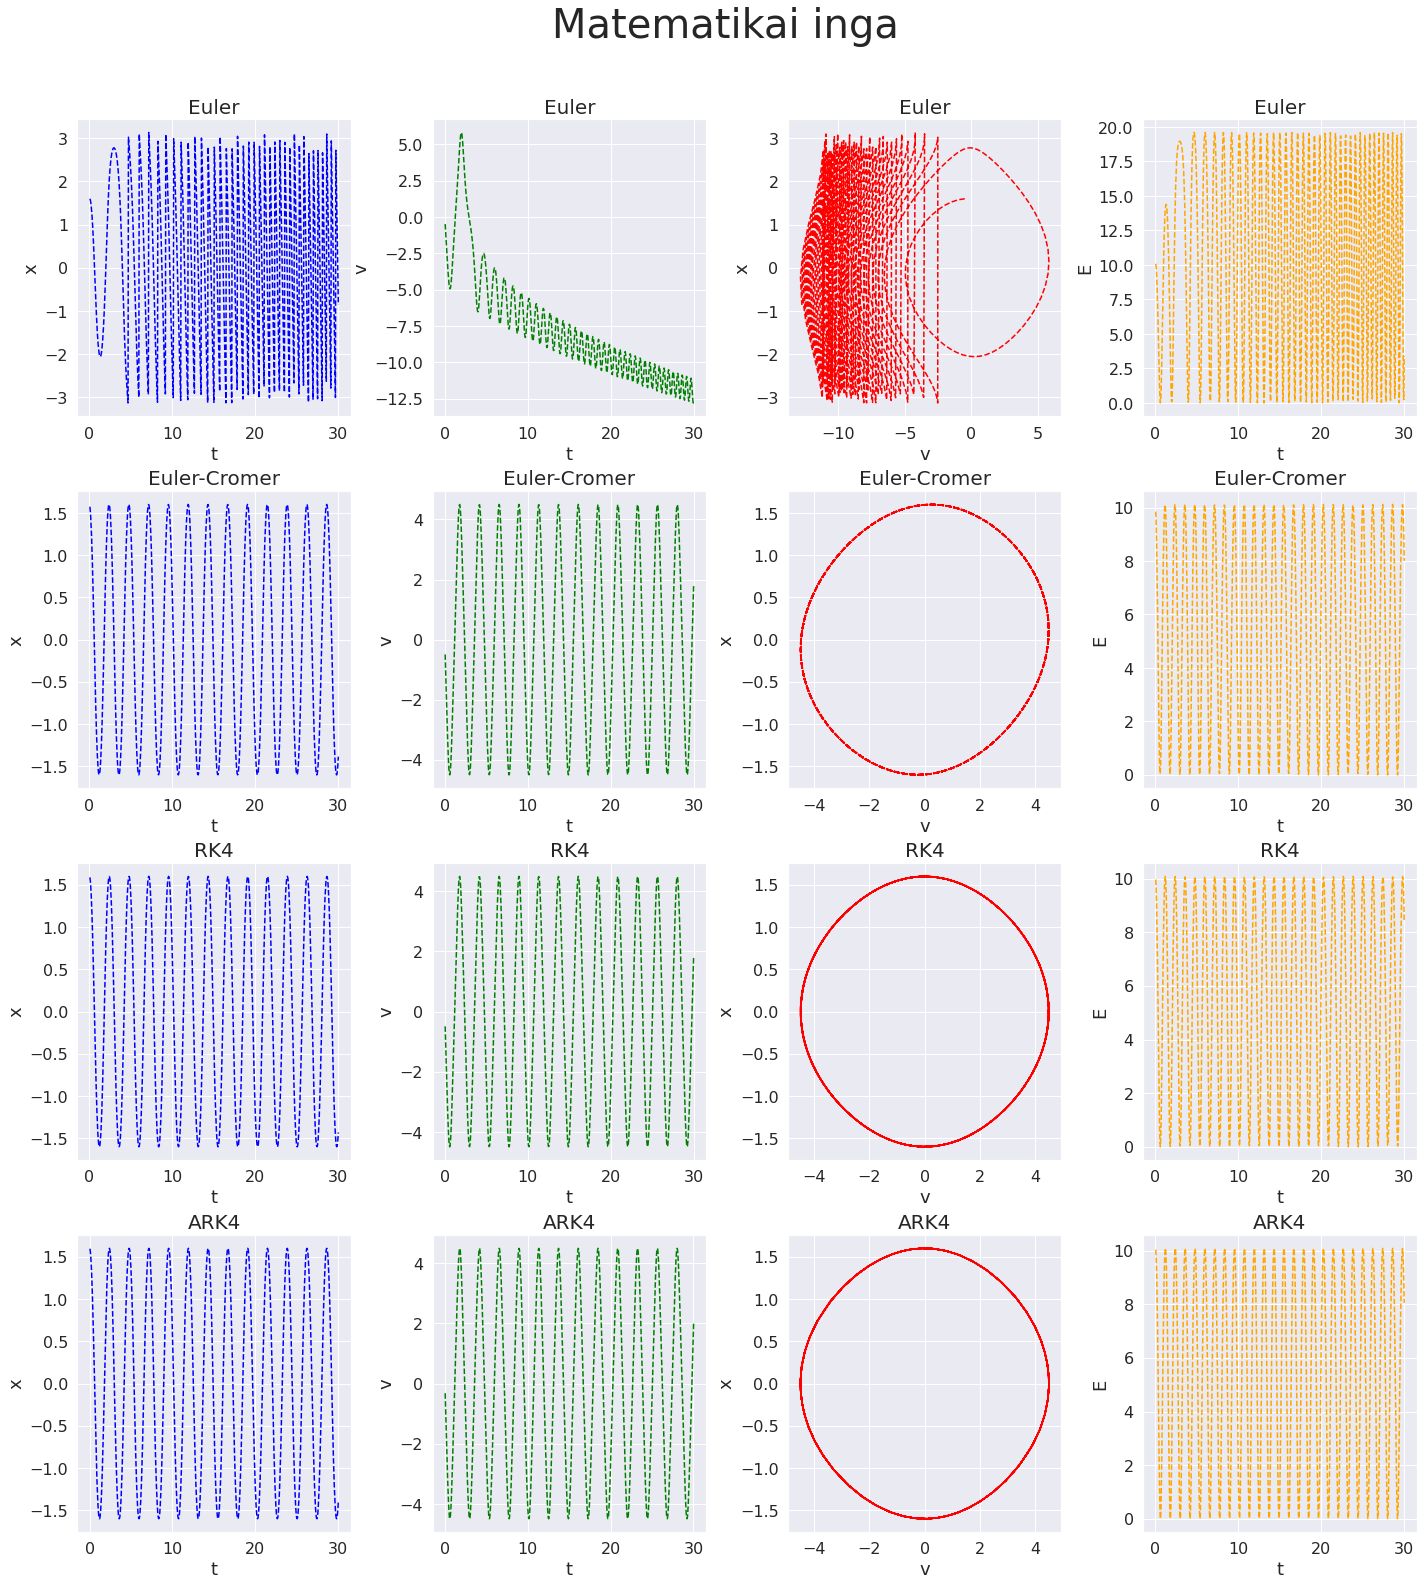

In [19]:
#params: L=1 ; q=0 ; Omega_D=0 ; F_D=0 ; theta=1.6 ; omega=0 ; Tmax=30
mat_names = ["mat_e.data","mat_ec.data","mat_RK4.data","mat_ARK4.data"]
x_y_data_mat = create_xy(path1,mat_names,4,cols)
#caption="1. ábra. Matematikai inga grafikonjai.\n Az inga paraméterei: L=1 ; q=0 ; Omega_D=0 ; F_D=0 ; theta=1.6 ; omega=0 ; Tmax=30."

multiplot(x_y_data_mat,4,4,(24,26),x_labels,y_labels,titles,linestyles,colors,style = style,
          suptitle="Matematikai inga", sup_y = 0.94, save_path="img/inga1/mat.pdf")

## Csillapított inga

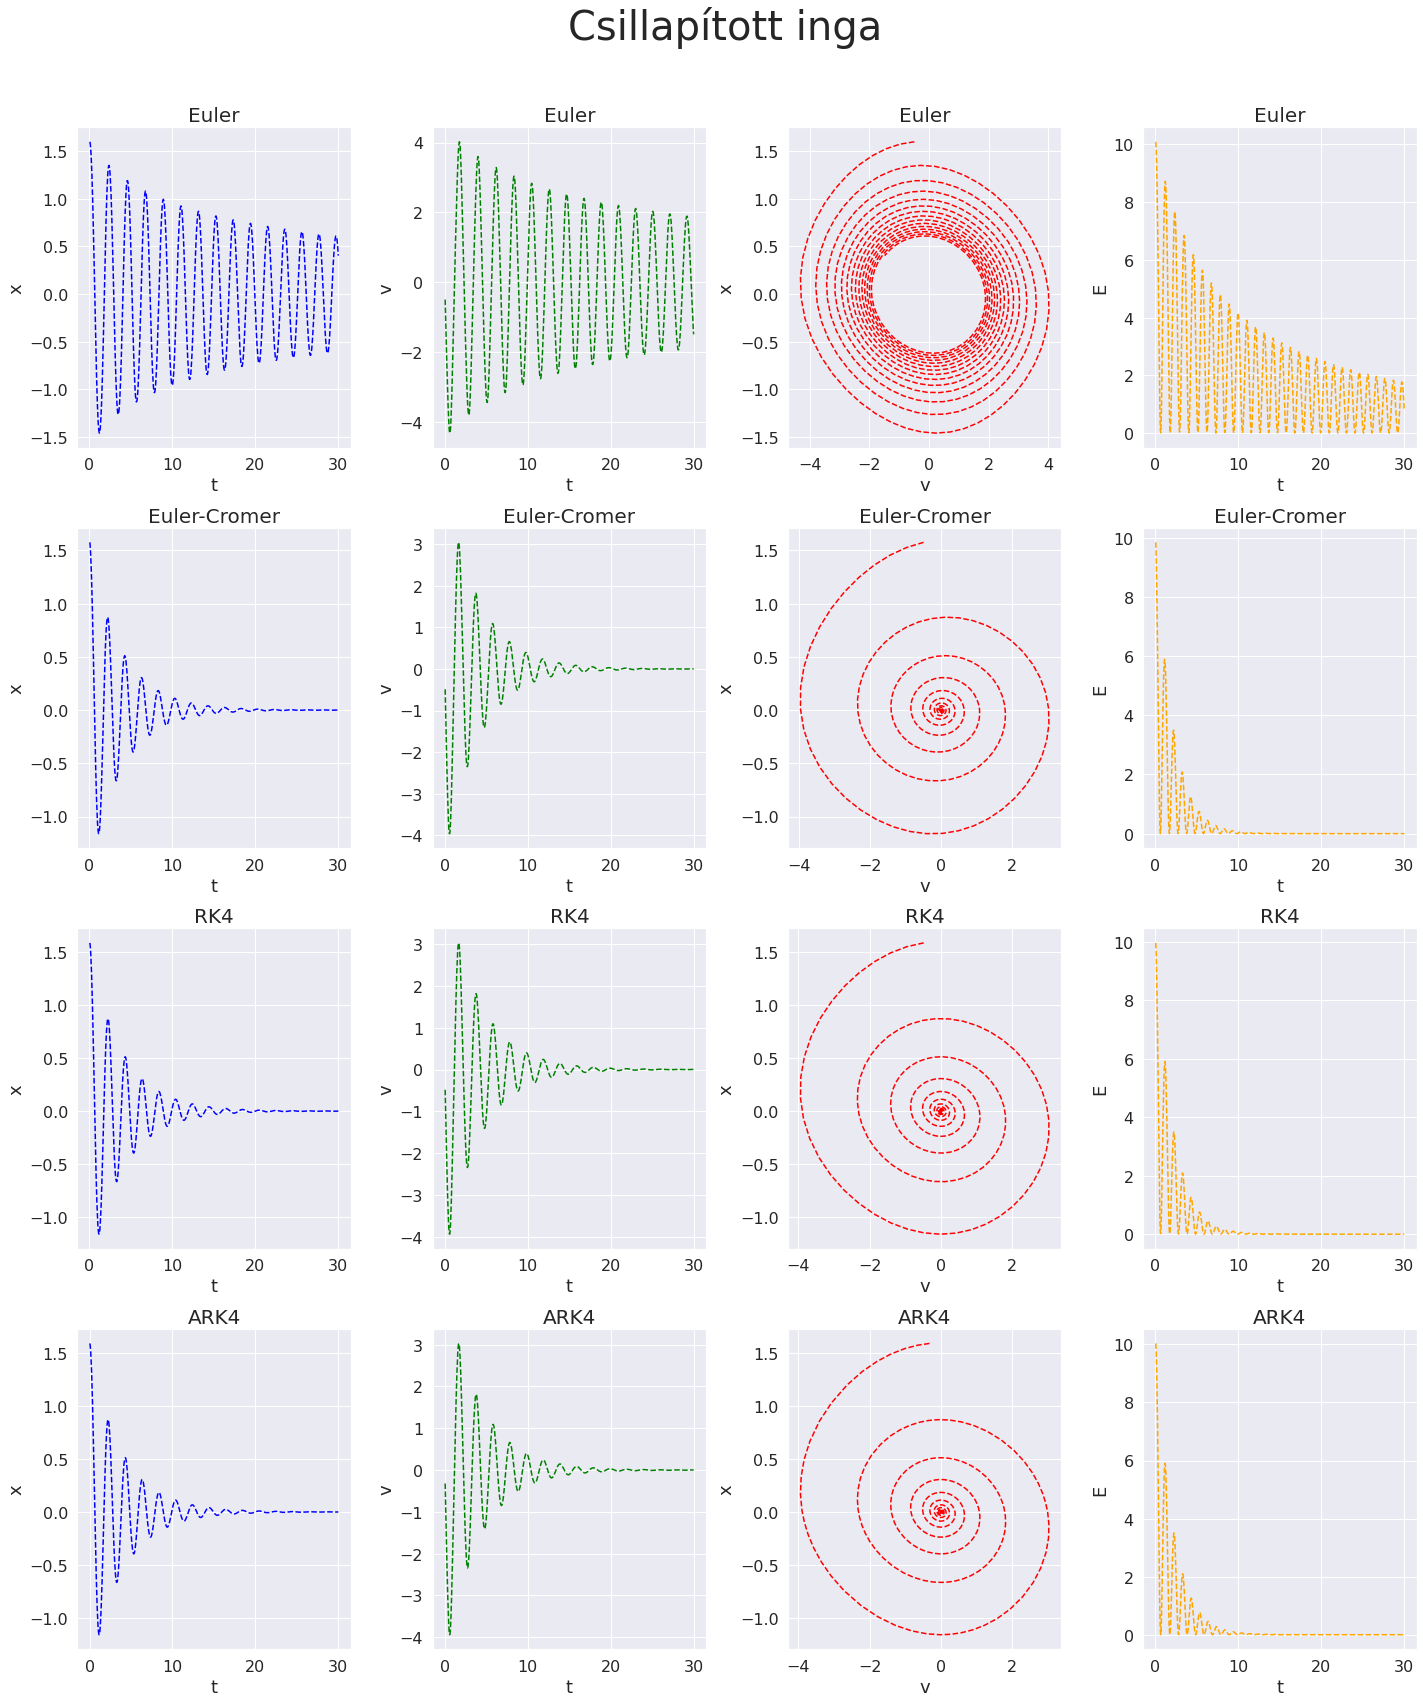

In [5]:
#params: L=1 ; q=0.5 ; Omega_D=0 ; F_D=0 ; theta=1.6 ; omega=0 ; Tmax=30
csill_names = ["csill_e.data","csill_ec.data","csill_RK4.data","csill_ARK4.data"]
x_y_data_csill = create_xy(path1,csill_names,4,cols)
#caption="Csillapított inga grafikonjai.\n Az inga paraméterei: L=1 ; q=0.5 ; Omega_D=0 ; F_D=0 ; theta=1.6 ; omega=0 ; Tmax=30."

multiplot(x_y_data_csill,4,4,(24,28),x_labels,y_labels,titles,linestyles,colors,style = style,
          suptitle="Csillapított inga", sup_y = 0.94, save_path="img/inga1/csill.pdf")

## Gerjesztett inga

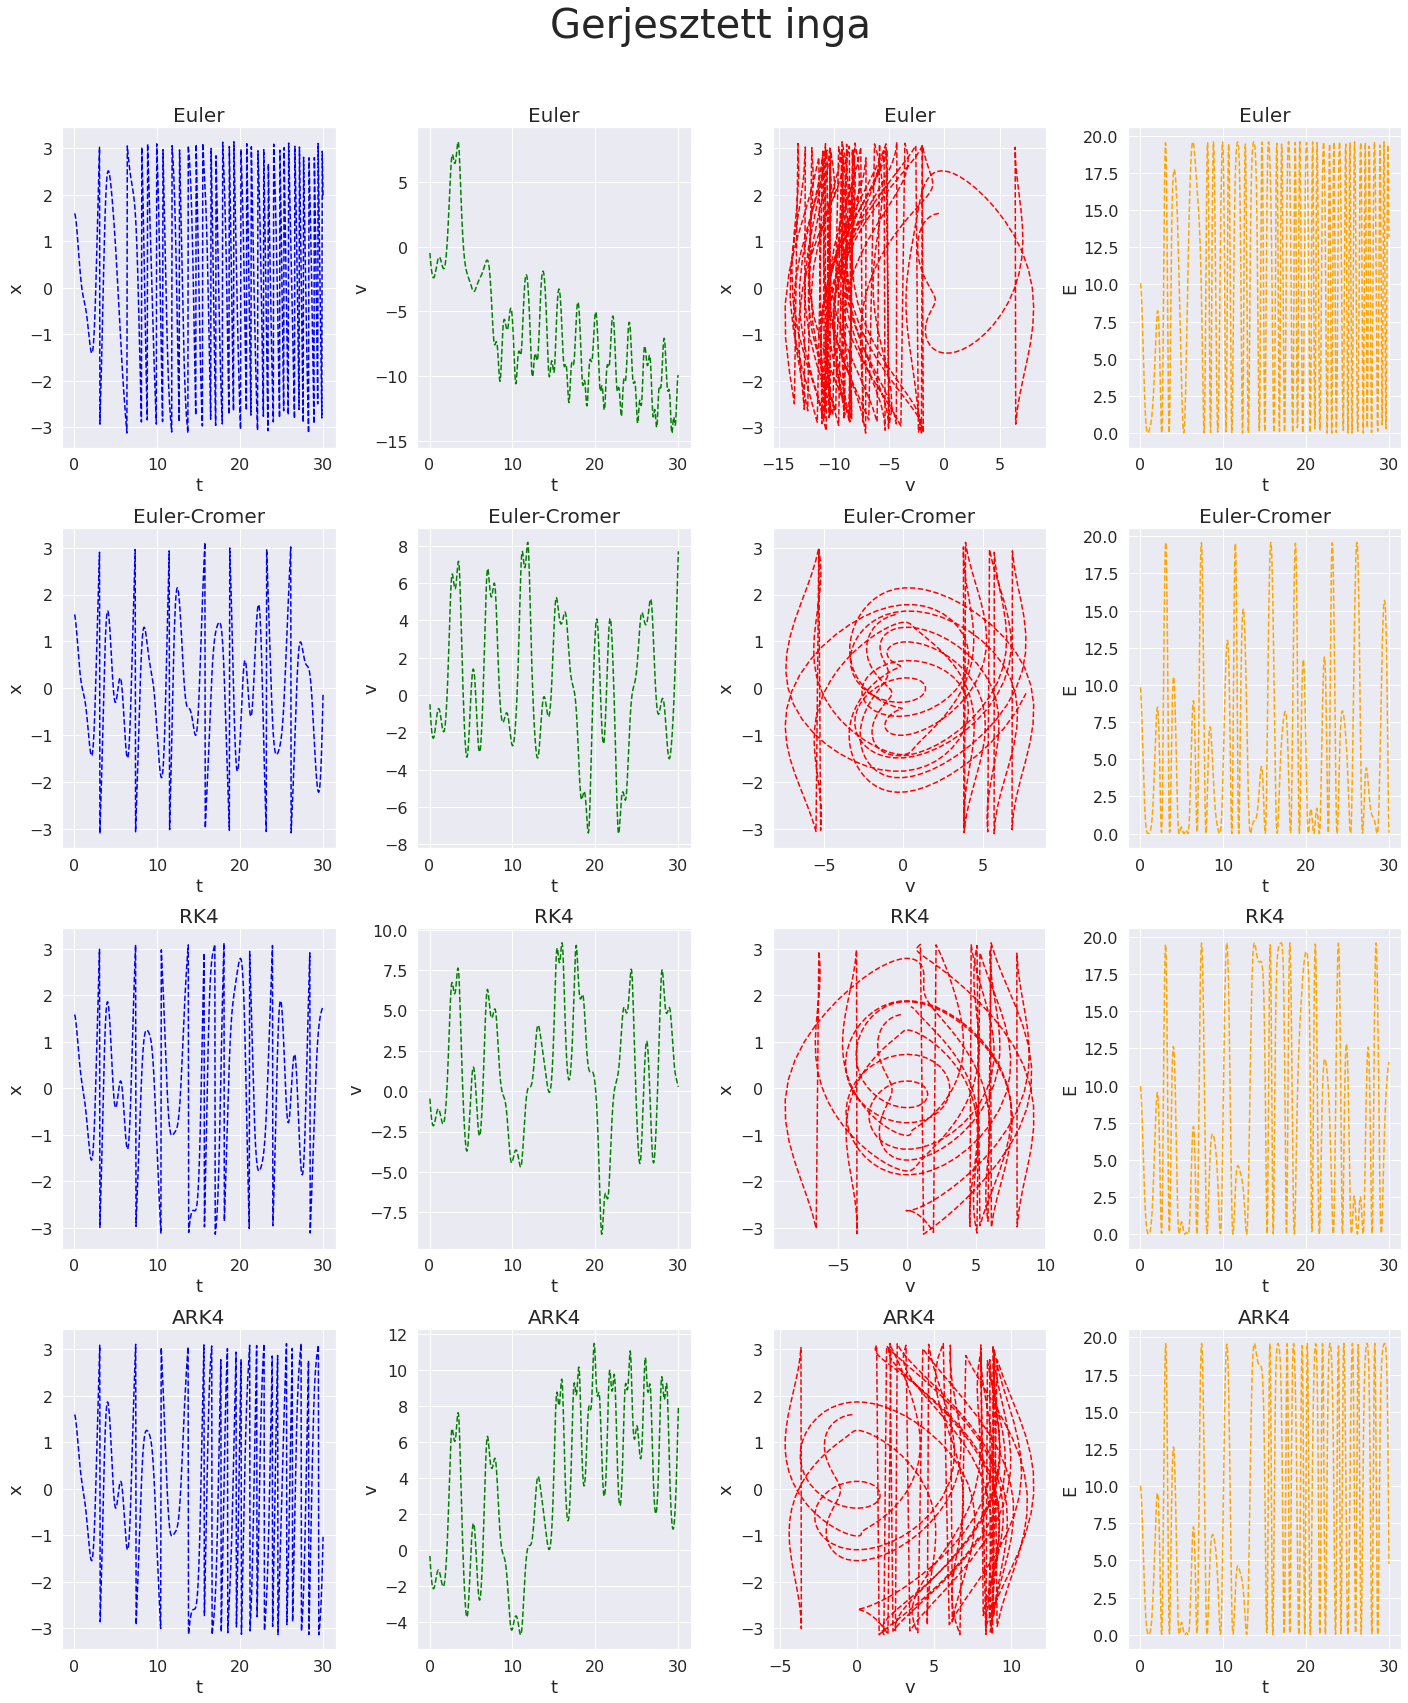

In [6]:
#params: L=1 ; q=0 ; Omega_D=3 ; F_D=8 ; theta=1.6 ; omega=0 ; Tmax=30
gerj_names = ["gerj_e.data","gerj_ec.data","gerj_RK4.data","gerj_ARK4.data"]
x_y_data_gerj = create_xy(path1,gerj_names,4,cols)
#caption="Gerjesztett inga grafikonjai.\n Az inga paraméterei: L=1 ; q=0 ; Omega_D=3 ; F_D=8 ; theta=1.6 ; omega=0 ; Tmax=30."

multiplot(x_y_data_gerj,4,4,(24,28),x_labels,y_labels,titles,linestyles,colors,style = style,
          suptitle="Gerjesztett inga", sup_y = 0.94, save_path="img/inga1/gerj.pdf")

## Csillapított és gerjesztett inga

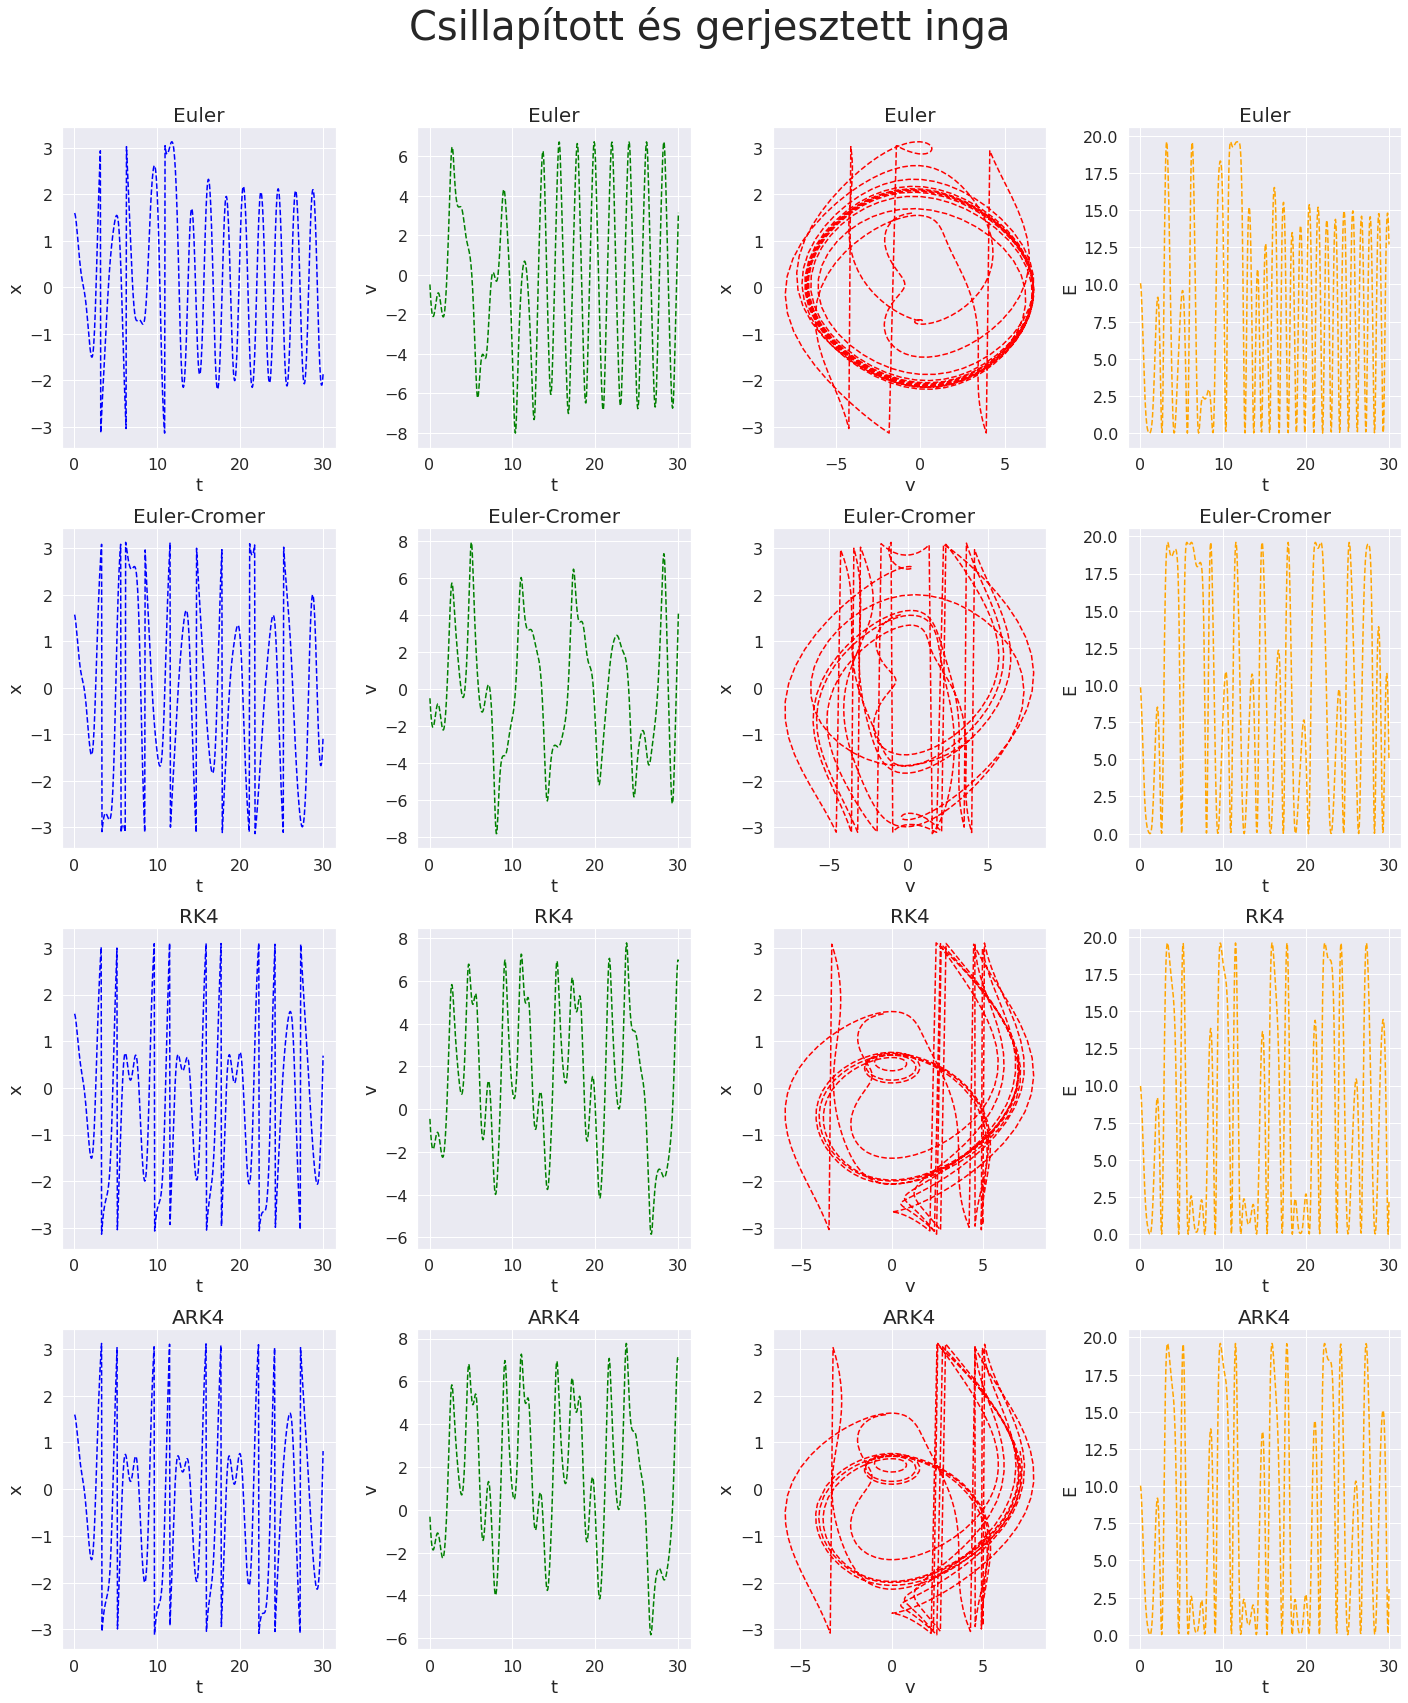

In [7]:
#params: L=1 ; q=0.5 ; Omega_D=3 ; F_D=8 ; theta=1.6 ; omega=0 ; Tmax=30
csill_gerj_names = ["csill_gerj_e.data","csill_gerj_ec.data","csill_gerj_RK4.data","csill_gerj_ARK4.data"]
x_y_data_csill_gerj = create_xy(path1,csill_gerj_names,4,cols)
#caption="4. ábra. Csillapított és gerjesztett inga grafikonjai.\n Az inga paraméterei: L=1 ; q=0.5 ; Omega_D=3 ; F_D=8 ; theta=1.6 ; omega=0 ; Tmax=30."

multiplot(x_y_data_csill_gerj,4,4,(24,28),x_labels,y_labels,titles,linestyles,colors,style = style,
          suptitle="Csillapított és gerjesztett inga", sup_y = 0.94, save_path="img/inga1/csill_gerj.pdf")

## Futási idők

In [2]:
import subprocess
import time

T_maxes = [i for i in range(10,120)]
times = []

for i in range(1,5):
    mode = []
    for j in T_maxes:
        t0 = time.time()
        subprocess.run(["./pendulum.bin","n","1","0","0","0","1.6","0","{}".format(j),"{}".format(i)], capture_output=False)
        t1 = time.time()
        mode.append(t1-t0)
    times.append(mode)

In [16]:
from scipy.optimize import curve_fit

def fun(x,a,b):
    return a * x + b

illeszt = []
for i in range(len(times)):
    popt, pcov = curve_fit(fun,T_maxes,times[i])
    perr = np.sqrt(np.diag(pcov))
    illeszt.append([popt,perr])
    
labels = ["Euler","Euler-Cromer","RK4","ARK4"]
colors = ["blue","orange","green","red"]

T_maxes = np.array(T_maxes)

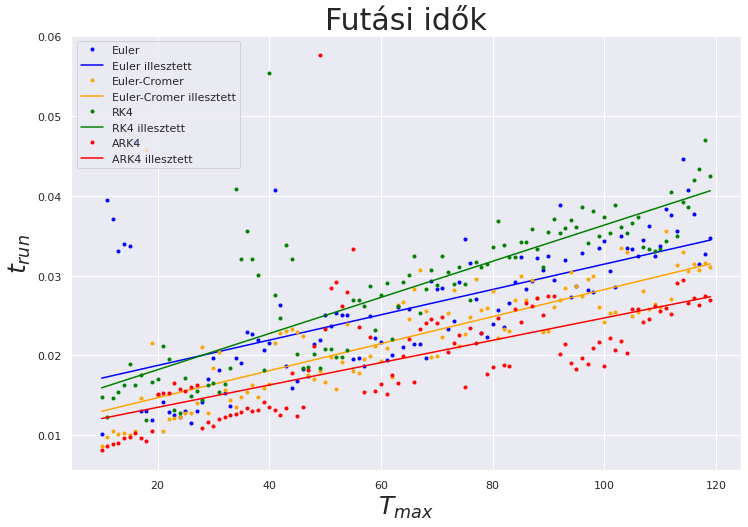

In [18]:
plt.figure(figsize=(12,8))
for i in range(len(times)):
    plt.plot(T_maxes,times[i],'.',color=colors[i],label=labels[i])
    plt.plot(T_maxes,fun(T_maxes,*illeszt[i][0]),'',color=colors[i],label=labels[i]+' illesztett')
plt.title("Futási idők",fontsize=30)
plt.xlabel("$T_{max}$",fontsize = 25)
plt.ylabel("$t_{run}$",fontsize = 25)
plt.legend(loc="upper left")
plt.savefig("./data/inga1/futas.pdf")

# Kettős inga

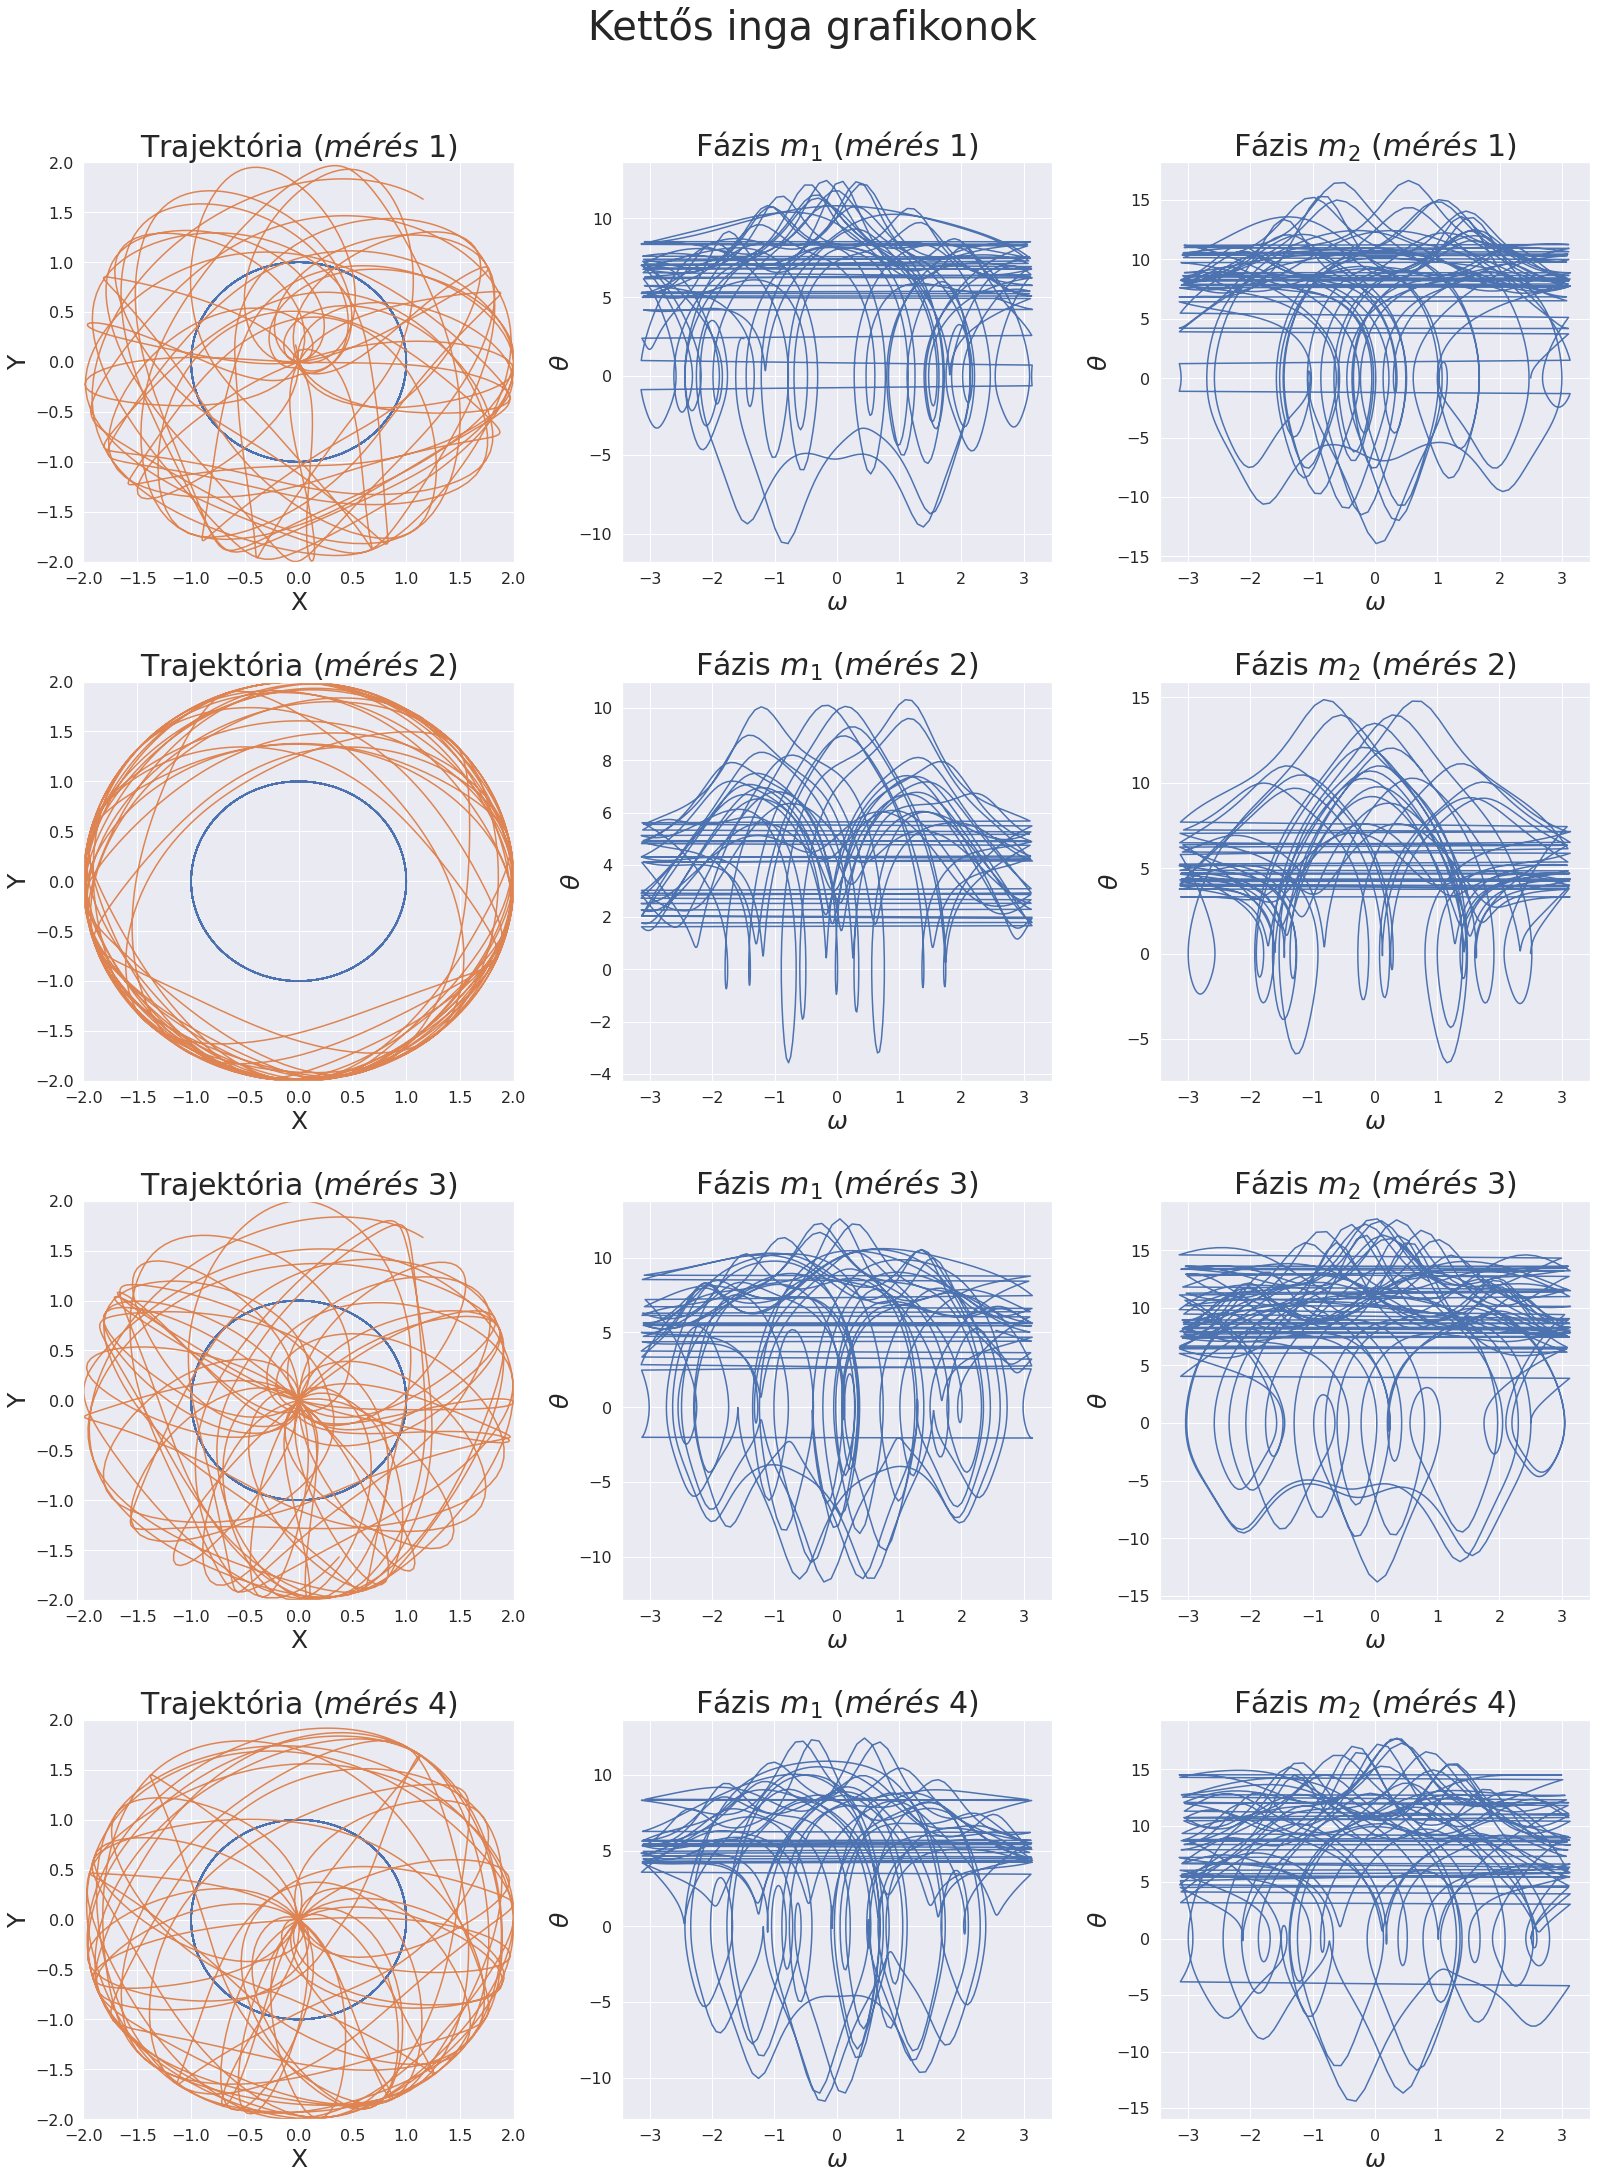

In [56]:
#params: 1 1 1 1 0 0 0 0 0 0 2.5 2.5 5 0 30
#params: 1 1 1 1 0 0 0 0 0 0 2.5 2.5 5.1 0 30
#params: 1 1 1 1 0 0 0 0 0 0 2.5 2.5 5.2 0 30
#params: 1 1 1 1 0 0 0 0 0 0 2.5 2.5 5.3 0 30

path2 = "./data/inga2"
cols2 = [(7,8),(9,10),(1,2),(4,5)] #,v(t),x(v),E(t)
double_names = ["double_pendulum1.data","double_pendulum2.data","double_pendulum3.data","double_pendulum4.data"]
xy = create_xy(path2,double_names,11,cols2)

style = {"xtick.labelsize" : 16, "ytick.labelsize" : 16}
plt.style.use(style)

fig, ax = plt.subplots(4,3,figsize=(27,36))
fig.suptitle("Kettős inga grafikonok",fontsize=40,y=0.94)
for i in range(4):
    ax[i][0].plot(xy[4*i][0],xy[4*i][1],label="$m_1$")
    ax[i][0].plot(xy[4*i+1][0],xy[4*i+1][1],label="$m_2$")
    ax[i][0].set_xlim(-2,2)
    ax[i][0].set_ylim(-2,2)
    ax[i][0].set_xlabel("X",fontsize = xy_s)
    ax[i][0].set_ylabel("Y",fontsize = xy_s)
    ax[i][0].set_title("Trajektória ($mérés$ ${}$)".format(i+1),fontsize = t_s)
    
    ax[i][1].plot(xy[4*i+2][0],xy[4*i+2][1])
    ax[i][1].set_xlabel("$\omega$",fontsize = xy_s)
    ax[i][1].set_ylabel("$\\theta$",fontsize = xy_s)
    ax[i][1].set_title("Fázis $m_1$ ($mérés$ ${}$)".format(i+1),fontsize = t_s)
    
    ax[i][2].plot(xy[4*i+3][0],xy[4*i+3][1])
    ax[i][2].set_xlabel("$\omega$",fontsize = xy_s)
    ax[i][2].set_ylabel("$\\theta$",fontsize = xy_s)
    ax[i][2].set_title("Fázis $m_2$ ($mérés$ ${}$)".format(i+1),fontsize = t_s)
    
plt.subplots_adjust(wspace=ws,hspace=hs)
plt.savefig("./img/inga2/double_pendulum.pdf")

# Kettős inga animáció

In [8]:
def save_video(img_name,video_name,speed=10):
    img0=cv2.imread(glob.glob("{}0000.jpg".format(img_name))[0])
    frameSize = (img0.shape[1]//2, img0.shape[0]//2)
    out = cv2.VideoWriter('{}.avi'.format(video_name),cv2.VideoWriter_fourcc(*'DIVX'), speed, frameSize)
    
    for filename in sorted(glob.glob('{}*.jpg'.format(img_name)), key=os.path.getmtime):
        img = cv2.imread(filename)
        out.write(img)
    out.release()

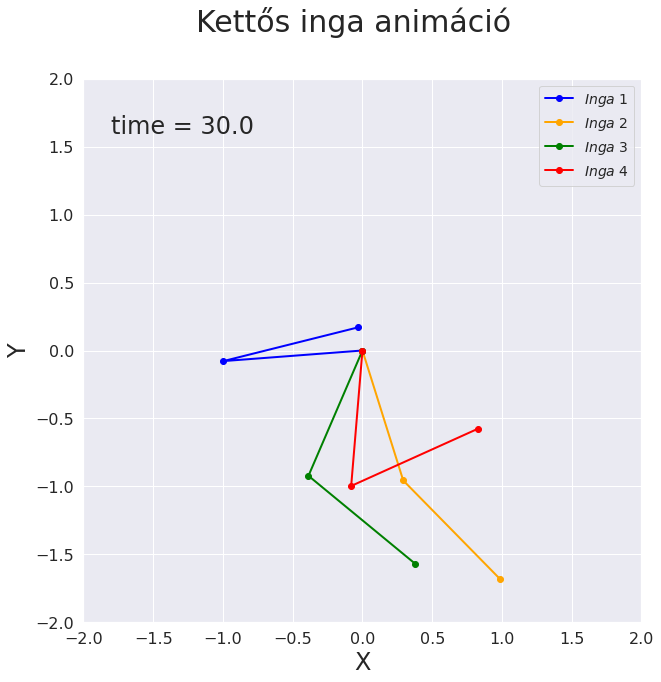

In [58]:
path2 = "./data/inga2"
cols_ani = [(0,7,8,9,10)]
double_names1 = ["double_pendulum1.data"]
double_names2 = ["double_pendulum2.data"]
double_names3 = ["double_pendulum3.data"]
double_names4 = ["double_pendulum4.data"]
t_x1_y1_x2_y2_1 = create_xy(path2,double_names1,11,cols_ani)[0]
t_x1_y1_x2_y2_2 = create_xy(path2,double_names2,11,cols_ani)[0]
t_x1_y1_x2_y2_3 = create_xy(path2,double_names3,11,cols_ani)[0]
t_x1_y1_x2_y2_4 = create_xy(path2,double_names4,11,cols_ani)[0]

fig = plt.figure(figsize=(10,10))
fig.suptitle("Kettős inga animáció",fontsize=30)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_xlabel("X",fontsize=24)
ax.set_ylabel("Y",fontsize=24)
ax.grid(b=True)

line1, = ax.plot([], [], 'o-', lw=2,color="blue",label="$Inga$ $1$")
line2, = ax.plot([], [], 'o-', lw=2,color="orange",label="$Inga$ $2$")
line3, = ax.plot([], [], 'o-', lw=2,color="green",label="$Inga$ $3$")
line4, = ax.plot([], [], 'o-', lw=2,color="red",label="$Inga$ $4$")

time_template = 'time = %.1f'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes,fontsize=24)

ax.legend(loc="upper right",fontsize=14)

for i in range(len(t_x1_y1_x2_y2_1[0])):
    thisx1 = [0, t_x1_y1_x2_y2_1[1][i], t_x1_y1_x2_y2_1[3][i]]
    thisy1 = [0, t_x1_y1_x2_y2_1[2][i], t_x1_y1_x2_y2_1[4][i]]
    line1.set_data(thisx1, thisy1)
    thisx2 = [0, t_x1_y1_x2_y2_2[1][i], t_x1_y1_x2_y2_2[3][i]]
    thisy2 = [0, t_x1_y1_x2_y2_2[2][i], t_x1_y1_x2_y2_2[4][i]]
    line2.set_data(thisx2, thisy2)
    thisx3 = [0, t_x1_y1_x2_y2_3[1][i], t_x1_y1_x2_y2_3[3][i]]
    thisy3 = [0, t_x1_y1_x2_y2_3[2][i], t_x1_y1_x2_y2_3[4][i]]
    line3.set_data(thisx3, thisy3)
    thisx4 = [0, t_x1_y1_x2_y2_4[1][i], t_x1_y1_x2_y2_4[3][i]]
    thisy4 = [0, t_x1_y1_x2_y2_4[2][i], t_x1_y1_x2_y2_4[4][i]]
    line4.set_data(thisx4, thisy4)
    
    time_text.set_text(time_template % (t_x1_y1_x2_y2_1[0][i]))
    plt.savefig("./img/inga2/animation_imgs/%4.4d.jpg"% (i))

In [9]:
import cv2
import glob
import os
save_video("./img/inga2/animation_imgs/","double_pendulum",speed=100)

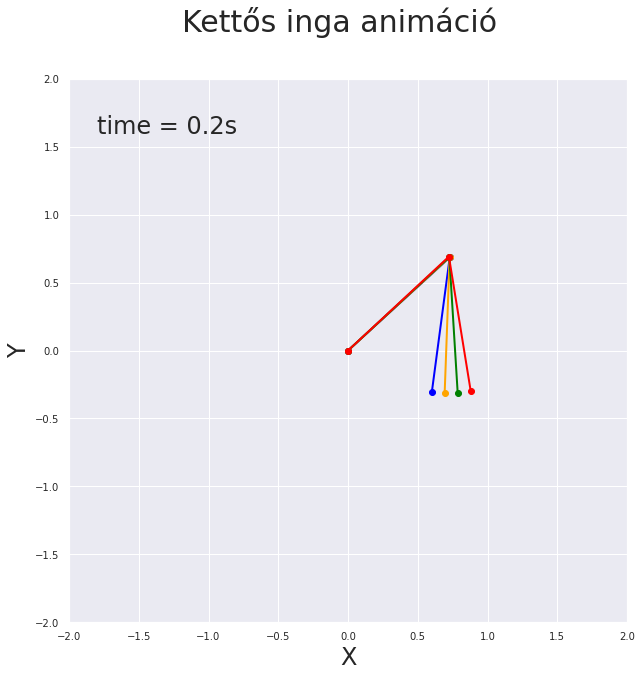

In [7]:
#Ez nem ment sehogysem, nem tudtam rendesen telepíteni az ffmpeg-et (--disable-libx264)
import matplotlib.animation as animation

path2 = "./data/inga2"
cols_ani = [(0,1,2,3,4)]
double_names1 = ["double_pendulum_coordinates1.data"]
double_names2 = ["double_pendulum_coordinates2.data"]
double_names3 = ["double_pendulum_coordinates3.data"]
double_names4 = ["double_pendulum_coordinates4.data"]
t_x1_y1_x2_y2_1 = create_xy(path2,double_names1,5,cols_ani)[0]
t_x1_y1_x2_y2_2 = create_xy(path2,double_names2,5,cols_ani)[0]
t_x1_y1_x2_y2_3 = create_xy(path2,double_names3,5,cols_ani)[0]
t_x1_y1_x2_y2_4 = create_xy(path2,double_names4,5,cols_ani)[0]

fig = plt.figure(figsize=(10,10))
fig.suptitle("Kettős inga animáció",fontsize=30)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_xlabel("X",fontsize=24)
ax.set_ylabel("Y",fontsize=24)
ax.grid(b=True)

line1, = ax.plot([], [], 'o-', lw=2,color="blue")
line2, = ax.plot([], [], 'o-', lw=2,color="orange")
line3, = ax.plot([], [], 'o-', lw=2,color="green")
line4, = ax.plot([], [], 'o-', lw=2,color="red")

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes,fontsize=24)


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    time_text.set_text('')
    return line1, line2, line3, line4, time_text


def animate(i):
    thisx1 = [0, t_x1_y1_x2_y2_1[1][i], t_x1_y1_x2_y2_1[3][i]]
    thisy1 = [0, t_x1_y1_x2_y2_1[2][i], t_x1_y1_x2_y2_1[4][i]]
    line1.set_data(thisx1, thisy1)
    thisx2 = [0, t_x1_y1_x2_y2_2[1][i], t_x1_y1_x2_y2_2[3][i]]
    thisy2 = [0, t_x1_y1_x2_y2_2[2][i], t_x1_y1_x2_y2_2[4][i]]
    line2.set_data(thisx2, thisy2)
    thisx3 = [0, t_x1_y1_x2_y2_3[1][i], t_x1_y1_x2_y2_3[3][i]]
    thisy3 = [0, t_x1_y1_x2_y2_3[2][i], t_x1_y1_x2_y2_3[4][i]]
    line3.set_data(thisx3, thisy3)
    thisx4 = [0, t_x1_y1_x2_y2_4[1][i], t_x1_y1_x2_y2_4[3][i]]
    thisy4 = [0, t_x1_y1_x2_y2_4[2][i], t_x1_y1_x2_y2_4[4][i]]
    line4.set_data(thisx4, thisy4)
    
    time_text.set_text(time_template % (t_x1_y1_x2_y2_1[0][i]))
    return line1, line2, line3, line4, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, 20),
                              interval=10, blit=False, init_func=init)

writer = animation.ImageMagickWriter(fps=100, bitrate=-1)
ani.save('double_pendulum.mp4', writer=writer)
#ani.to_html5_video()